DATASET PREVIEW


,customer_id,tenure_months,monthly_charges,contract_type,churn
0,1,1,499,Monthly,Yes
1,2,3,599,Monthly,Yes
2,3,6,699,Quarterly,No
3,4,12,899,Yearly,No
4,5,2,499,Monthly,Yes


Overall Churn Rate: 30.00%


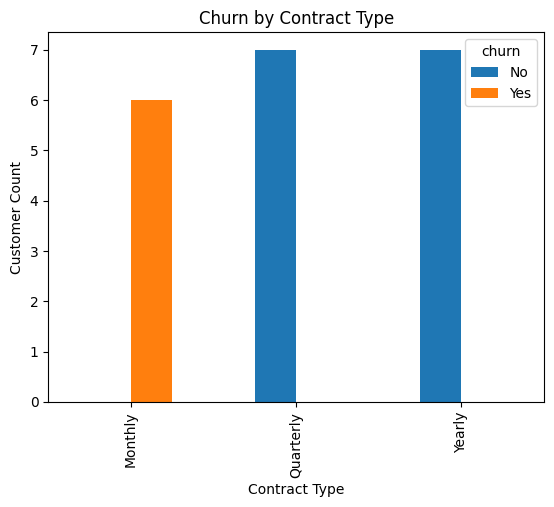

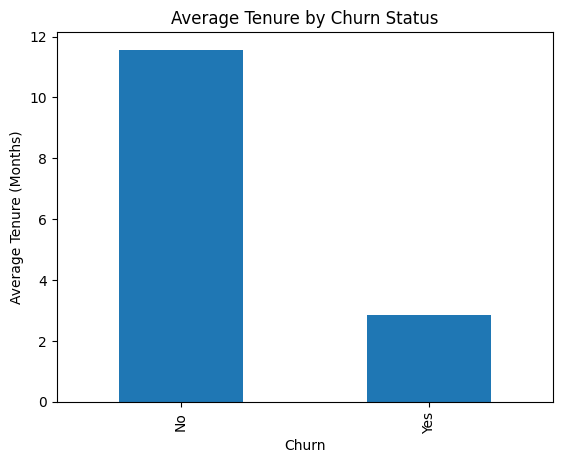

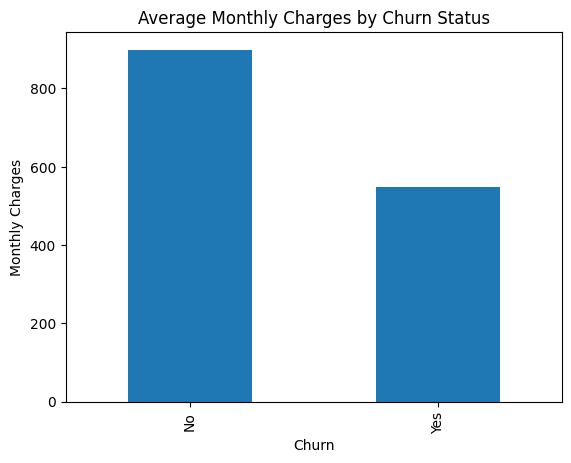

KEY INSIGHTS:
1. Customers with monthly contracts have higher churn.
2. Churned customers have lower average tenure.
3. Higher monthly charges slightly increase churn risk.
4. Yearly contract customers show strong retention.
customer_churn_data.csv file created successfully.


In [2]:
# =========================================
# Task 2: Customer Retention & Churn Analysis
# Google Colab - Single Cell Code
# =========================================

import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------
# Create Dummy Customer Dataset
# ------------------------------
data = {
    "customer_id": range(1, 21),
    "tenure_months": [1,3,6,12,2,8,15,4,10,18,5,7,9,14,16,11,13,17,6,2],
    "monthly_charges": [499,599,699,899,499,799,999,599,699,1099,
                         599,799,699,999,1099,899,999,1199,699,499],
    "contract_type": [
        "Monthly","Monthly","Quarterly","Yearly","Monthly",
        "Quarterly","Yearly","Monthly","Quarterly","Yearly",
        "Monthly","Quarterly","Quarterly","Yearly","Yearly",
        "Quarterly","Yearly","Yearly","Quarterly","Monthly"
    ],
    "churn": [
        "Yes","Yes","No","No","Yes",
        "No","No","Yes","No","No",
        "Yes","No","No","No","No",
        "No","No","No","No","Yes"
    ]
}

df = pd.DataFrame(data)

print("DATASET PREVIEW")
display(df.head())

# ------------------------------
# Churn Rate Calculation
# ------------------------------
churn_counts = df["churn"].value_counts()
churn_rate = (churn_counts["Yes"] / len(df)) * 100

print(f"Overall Churn Rate: {churn_rate:.2f}%")

# ------------------------------
# Churn by Contract Type
# ------------------------------
contract_churn = df.groupby("contract_type")["churn"].value_counts().unstack()
contract_churn.plot(kind="bar", title="Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Customer Count")
plt.show()

# ------------------------------
# Tenure vs Churn
# ------------------------------
tenure_churn = df.groupby("churn")["tenure_months"].mean()

tenure_churn.plot(kind="bar", title="Average Tenure by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Average Tenure (Months)")
plt.show()

# ------------------------------
# Monthly Charges vs Churn
# ------------------------------
charges_churn = df.groupby("churn")["monthly_charges"].mean()

charges_churn.plot(kind="bar", title="Average Monthly Charges by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()

# ------------------------------
# Key Insights
# ------------------------------
print("KEY INSIGHTS:")
print("1. Customers with monthly contracts have higher churn.")
print("2. Churned customers have lower average tenure.")
print("3. Higher monthly charges slightly increase churn risk.")
print("4. Yearly contract customers show strong retention.")

# ------------------------------
# Save Dataset for GitHub
# ------------------------------
df.to_csv("customer_churn_data.csv", index=False)
print("customer_churn_data.csv file created successfully.")
